In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import pymysql
import os, glob
import csv

In [4]:
folder_name = 'C:/Users/Bendras/Documents/INGA/FinalProject_SheGoesTech/Raw data cities'

# detecting all .csv files
csv_files = glob.glob(os.path.join(f'{folder_name}/*.csv'))

In [5]:
full_df = pd.DataFrame()

for csv in csv_files:

    city_name = csv.split(folder_name)[1].split('_')[0][1:]
    day_type = csv.split(folder_name)[1].split('_')[1].split('.csv')[0]

    df = pd.read_csv(csv)
    df['city'] = city_name
    df['day_type'] = day_type

    full_df = pd.concat([full_df, df]).reset_index(drop=True)

In [18]:
full_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends
51703,1795,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends
51704,1796,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends
51705,1797,301.054157,Private room,False,True,2.0,False,0,0,10.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends


In [19]:
full_df.to_csv("Airbnb_full.csv",index=False,encoding="utf8",sep=";")
full_df.to_excel("Airbnb_full.xlsx",index=False)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends
51703,1795,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends
51704,1796,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends
51705,1797,301.054157,Private room,False,True,2.0,False,0,0,10.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends


In [20]:
import mysql.connector

# Establishing a connection to the database
cnx = mysql.connector.connect(user='root',
                              password='',
                              host='localhost',
                              database='airbnb prices')

# Creating a cursor object
cursor = cnx.cursor()

In [22]:
from sqlalchemy import create_engine
engine = create_engine("mysql+pymysql://root:@localhost/airbnb prices")

full_df.to_sql(name="Airbnb_full",con=engine,if_exists="append",index=False)

C:\Users\Bendras\AppData\Local\Temp\ipykernel_12452\2600721186.py:4: UserWarning: The provided table name 'Airbnb_full' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  full_df.to_sql(name="Airbnb_full",con=engine,if_exists="append",index=False)


51707

In [44]:
cursor.execute("ALTER TABLE airbnb_full DROP ISTRINTI")

In [4]:
from sqlalchemy import text

engine = create_engine("mysql+pymysql://root:@localhost/airbnb prices")

with engine.begin() as con:
    query = text("SELECT * FROM airbnb_full")
    airbnb_df = pd.read_sql(query,con)
#     airbnb_df.to_csv("airbnb_full.csv",index=False,encoding="utf8",sep=";")
#     airbnb_df.to_excel("airbnb_full.xlsx",index=False)

In [5]:
import mysql.connector
from sqlalchemy import create_engine

# Establishing a connection to the database
cnx = mysql.connector.connect(user='root',
                              password='',
                              host='localhost',
                              database='airbnb prices')

# Creating a cursor object
cursor = cnx.cursor()

from sqlalchemy import text

engine = create_engine("mysql+pymysql://root:@localhost/airbnb prices")

with engine.begin() as con:
    query = text("SELECT * FROM airbnb_full")
    airbnb_db = pd.read_sql(query,con)

airbnb_db.isnull().sum()

ID                            0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
day_type                      0
dtype: int64

In [12]:
airbnb_db.describe()

,ID,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,25854.000000,279.879591,0.007078,0.361518,3.161661,0.255903,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,14926.669521,327.948386,0.083835,0.480445,1.298545,0.436372,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,1.000000,34.779339,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,12927.500000,148.752174,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,25854.000000,211.343089,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,38780.500000,319.694287,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,51707.000000,18545.450285,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [6]:
airbnb_db['city'] = airbnb_db['city'].str.capitalize()
airbnb_db.to_sql('airbnb_full', con=engine, if_exists='replace', index=False)
cnx.close()

In [27]:
average_price = airbnb_db.groupby(['city'], as_index=False)['realSum'].mean().rename(columns={'realSum':'Average'})
# average_price = average_price.sort_values('Average', ascending=False)
average_price

,city,Average
0,Amsterdam,573.112795
1,Athens,151.744121
2,Barcelona,293.753706
3,Berlin,244.583752
4,Budapest,176.513548
5,Lisbon,238.210479
6,London,362.469256
7,Paris,392.531403
8,Rome,205.391950
9,Vienna,241.582484


In [28]:
airbnb_counts=airbnb_db.groupby(['city'], as_index=False)['realSum'].count().reset_index().rename(columns={'realSum':'Count'})
# airbnb_counts=airbnb_counts.sort_values(by=['Count'],ascending=False)
airbnb_counts

,index,city,Count
0,0,Amsterdam,2080
1,1,Athens,5280
2,2,Barcelona,2833
3,3,Berlin,2484
4,4,Budapest,4022
5,5,Lisbon,5763
6,6,London,9993
7,7,Paris,6688
8,8,Rome,9027
9,9,Vienna,3537


In [38]:
satisfaction=airbnb_db.groupby(['city'], as_index=False)['guest_satisfaction_overall'].mean().reset_index().rename(columns={'guest_satisfaction_overall':'Satisfaction'})
satisfaction['Satisfaction']=satisfaction['Satisfaction'].round(2)

satisfaction

,index,city,Satisfaction
0,0,Amsterdam,94.51
1,1,Athens,95.00
2,2,Barcelona,91.11
3,3,Berlin,94.32
4,4,Budapest,94.59
5,5,Lisbon,91.09
6,6,London,90.65
7,7,Paris,92.04
8,8,Rome,93.12
9,9,Vienna,93.73


C:\Users\Bendras\AppData\Local\Temp\ipykernel_9836\3790762541.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  satisfaction_patch = mpatches.Patch(color='white', label='Guest Satisfaction', edgecolor='black')


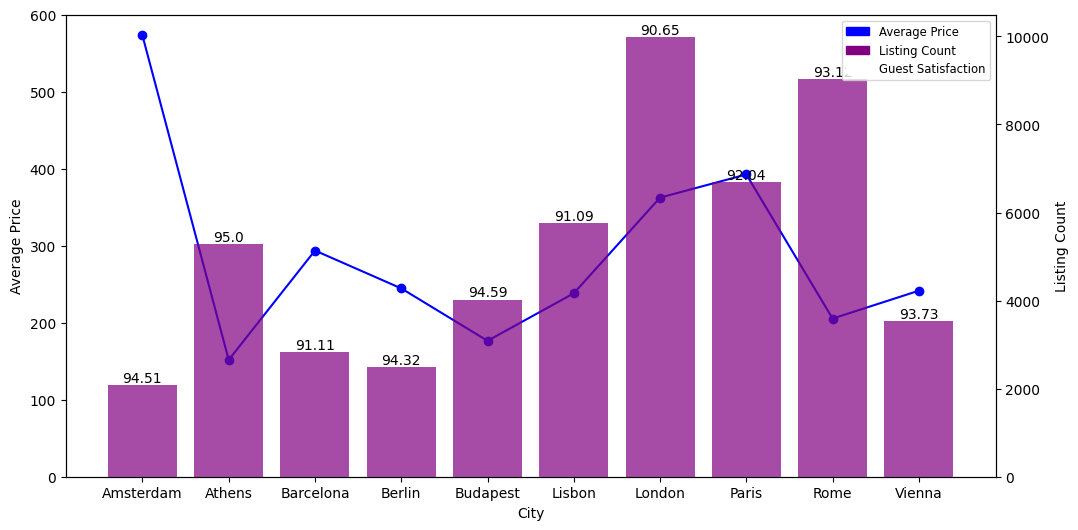

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Merge the airbnb_counts DataFrame with the satisfaction table
merged_data = pd.merge(airbnb_counts, satisfaction, on='city')

# Line plot
x = average_price['city']
y1 = average_price['Average']
ax1.plot(x, y1, color='blue', marker='o', label='Average Price')

# Bar plot
y2 = airbnb_counts['Count']
ax2.bar(x, y2, color='purple', alpha=0.7, label='Listing Count')

ax1.set_ylim([0, 600])

# Add satisfaction values on top of the count bars
for i, value in enumerate(merged_data['Satisfaction']):
    ax2.text(i, merged_data['Count'][i], str(value), ha='center', va='bottom')
 
# Set labels and title
ax1.set_xlabel('City')
ax1.set_ylabel('Average Price')
ax2.set_ylabel('Listing Count')

# Create custom legend handles and labels
legend_handles = []
legend_labels = []

# Add average price to legend handles and labels
average_price_patch = mpatches.Patch(color='blue', label='Average Price')
legend_handles.append(average_price_patch)
legend_labels.append('Average Price')

# Add count to legend handles and labels
count_patch = mpatches.Patch(color='purple', label='Listing Count')
legend_handles.append(count_patch)
legend_labels.append('Listing Count')

# Add satisfaction to legend handles and labels
satisfaction_patch = mpatches.Patch(color='white', label='Guest Satisfaction', edgecolor='black')
legend_handles.append(satisfaction_patch)
legend_labels.append('Guest Satisfaction')

# Create the legend
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper right', fontsize='small')
    
# # Set labels and title
# ax1.set_xlabel('City')
# ax1.set_ylabel('Average Price')
# ax2.set_ylabel('Listing Count / Guest Satisfaction')

# # Set and combine the legends
# lines, labels = ax1.get_legend_handles_labels()
# bars, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + bars, labels + labels2, loc='upper right', fontsize='small', ncol=1)

# Show the plot
plt.show()


In [69]:
import mysql.connector
from sqlalchemy import create_engine
from sqlalchemy import text
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import pymysql
import os, glob
import csv

# Establishing a connection to the database
cnx = mysql.connector.connect(user='root',
                              password='',
                              host='localhost',
                              database='airbnb prices')

# Creating a cursor object
cursor = cnx.cursor()

engine = create_engine("mysql+pymysql://root:@localhost/airbnb prices")

with engine.begin() as con:
    query = text("SELECT * FROM airbnb_full")
    airbnb_db = pd.read_sql(query,con)


ranks = airbnb_db.groupby('city')['realSum'].mean().sort_values()[::-1].index
ranks

Index(['Amsterdam', 'Paris', 'London', 'Barcelona', 'Berlin', 'Vienna',
       'Lisbon', 'Rome', 'Budapest', 'Athens'],
      dtype='object', name='city')

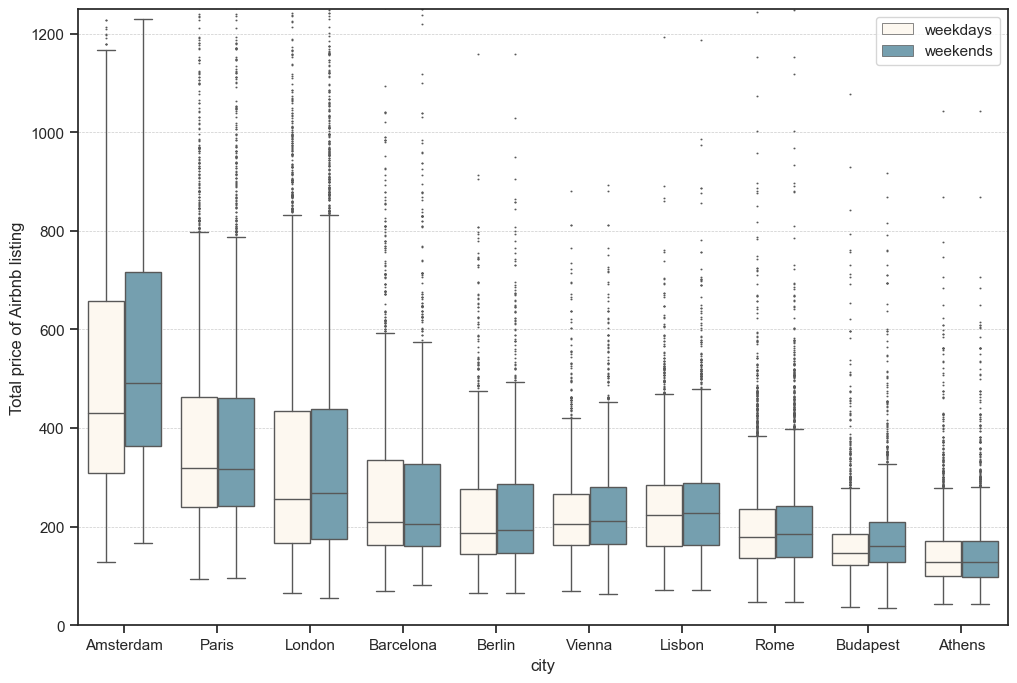

<Figure size 640x480 with 0 Axes>

In [70]:
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.axis([0,8,0,1250])
sns.set_theme(style='ticks', palette='muted')
sns.boxplot(x="city", y="realSum", hue="day_type", palette=['#fff8ee', '#6ba3b9'], 
            data=airbnb_db, fliersize=0.5, linewidth=1, order=ranks)
plt.ylabel('Total price of Airbnb listing')
ax.set_xticklabels(ranks)
plt.grid(axis='y', linestyle='--', linewidth=.5)
plt.legend(loc=1)
plt.show()
plt.clf()

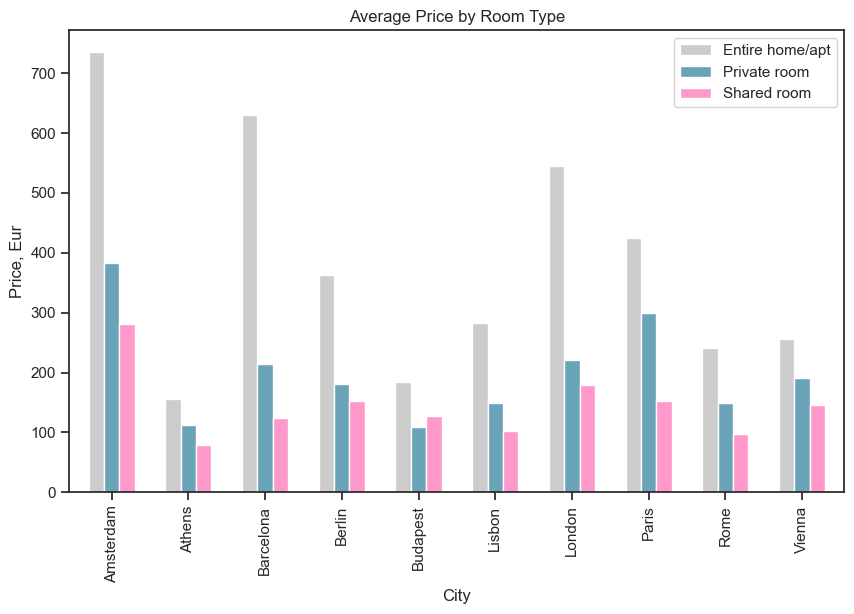

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))
room_type=airbnb_db.groupby(['city', 'room_type'])['realSum'].mean().unstack()
room_type.plot(kind='bar', ax=ax, width=0.6)

sns.set_theme(style='ticks', palette=['#cccccc', '#6ba3b9', '#ff99cc'])

# Set labels and title
ax.set_xlabel('City')
ax.set_ylabel('Price, Eur')
ax.set_title('Average Price by Room Type')
legend = ax.legend(title='', loc='upper right')
# Show the plot
plt.show()